In [27]:
%load_ext autoreload
%autoreload 2

import torch
from src.bnn import BayesianMLP, ELBO, fit_elbo, plot_predict_bnn, show_learning_curve, show_accuracy_curve
from src.data import batch_dataset, load_data, split_data

from sklearn.metrics import classification_report

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = load_data()
dataset = split_data(
    df,
    without_cols=[
        "Timestamp",
        "Light1",
        "Light2",
        "Light3",
        "Light4",
    ],
    scale="normalize",
)
seq_dataset = batch_dataset(dataset, sequence_length=25)

(x_train, y_train), (x_test, y_test) = dataset
(seq_x_train, seq_y_train), (seq_x_test, seq_y_test) = seq_dataset

In [14]:
bnn_model = BayesianMLP(
    num_input_features=12,
    num_hidden_features=64,
    num_output_classes=4,
)

loss_fun = ELBO(N=10)
optimizer = torch.optim.Adam(
    bnn_model.parameters(),
    lr=1e-3,
)

train_metrics, test_metrics = fit_elbo(
    model=bnn_model,
    dataset=dataset,
    loss_function=loss_fun,
    batch_size=32,
    epochs=20,
    optimizer=optimizer,
)


Epoch: 1 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 2 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 3 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 4 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 5 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 6 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 7 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 8 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 9 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 10 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 11 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 12 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 13 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 14 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 15 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 16 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 17 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 18 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 19 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 20 / 20


  0%|          | 0/253 [00:00<?, ?it/s]

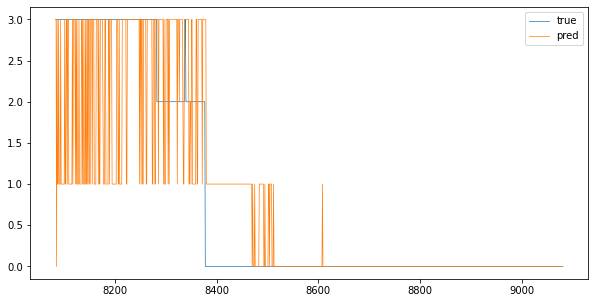

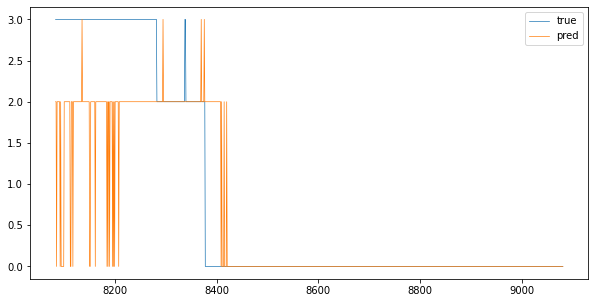

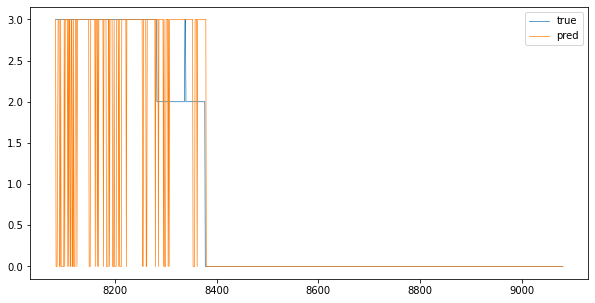

In [17]:
x = torch.tensor(x_test.to_numpy()).to(torch.float32)
plot_predict_bnn(bnn_model, x, y_test)
plot_predict_bnn(bnn_model, x, y_test)
plot_predict_bnn(bnn_model, x, y_test)

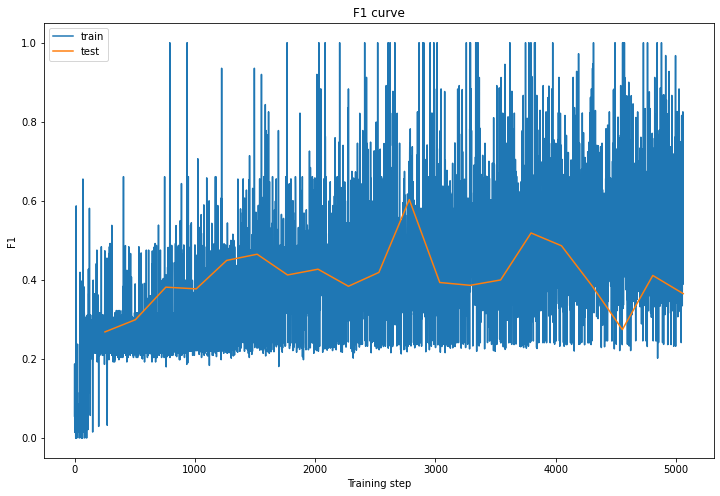

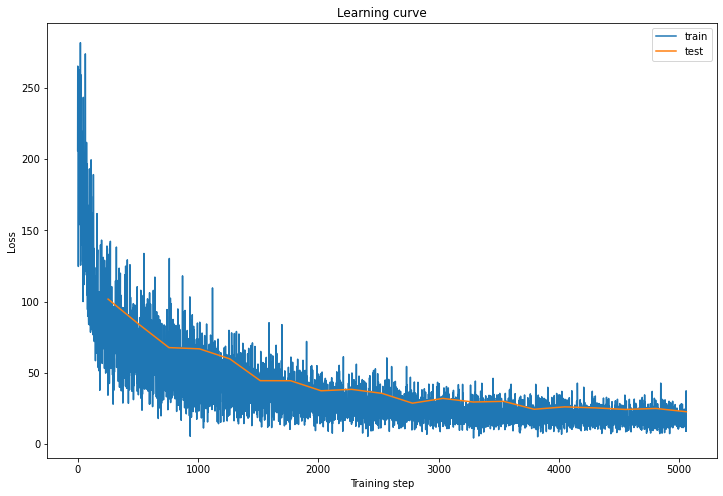

In [16]:
show_accuracy_curve(train_metrics, test_metrics)
show_learning_curve(train_metrics, test_metrics)

In [7]:
# torch.save(bnn_model.state_dict(), 'clf_state_dict.pt')

In [34]:
preds = bnn_model(x).argmax(dim=1)
print("MSE:", torch.nn.MSELoss()(torch.tensor(y_test.to_numpy()), preds.float()).item())
print(classification_report(y_test.to_numpy(), preds, zero_division=0))

MSE: 0.5867602825164795
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       703
           2       0.33      0.87      0.48        93
           3       0.00      0.00      0.00       201

    accuracy                           0.78       997
   macro avg       0.42      0.62      0.48       997
weighted avg       0.69      0.78      0.72       997

